# IBM Applied Data Science Capstone Project
# Car accident severity

Let's apply CRISP (Cross-Industry standart process for data mining) to that problem.

## Introduction

The costs of fatalities and injuries due to traffic accidents have a great impact on the society. In recent years, researchers have paid increasing attention to determining factors that significantly affect severity of driver injuries caused by traffic accidents. 

Annual Global Road Crash Statistics:
* Approximately 1.35 million people die in road crashes annually, on average 3,700 people lose their lives every day on the roads. 
* An additional 20-50 million suffer non-fatal injuries, often resulting in long-term disabilities.  
* More than half of all road traffic deaths occur among vulnerable road users—pedestrians, cyclists, and motorcyclists.  
* Road traffic injuries are the leading cause of death among young people aged 5-29. 
* Young adults aged 15-44 account for more than half of all road deaths.  
* On average, road crashes cost countries 3% of their gross domestic product. 

## Business Undertanding

For problem understanding let's see the situation: 
You are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. 
Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. 
Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.

The case study is to predict the severity of an accident. 

To reduce the frequency of car collisions we have to develope a model to predict the severity of an accident given the current weather, road and visibility conditions. 
When conditions are bad, this model will say to be more careful.

The machine learning model should be able to predict accident "severity".

## Data Understanding
The dataset contain 194673 observations (rows) and 37 attributes (columns).
The machine learning model should be able to predict accident "severity".
The target of prediction is 'SEVERITYCODE' (it is used to measure the severity of an accident).
In the dataset there are only 2 variants (1 - prop damage and 2 - injury).
But the target or label columns should be accident "severity" in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. 
The attributes we can use to predict the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

## Data Preparation:
This dataset is not fit for analysis perfectly.
We should not use all attributes for our model.

Most of the attributes are text-type, so we should convert them to a numerical type.
We should use label encoding to covert the features.

The target variable SEVERITYCODE is only 42% balanced. 
the quantity of severitycode in class 1 is 136485 and the class 2 is 58188.
We can fix this by downsampling the class 1.

There are a lot of empty fields - fill them by zero.

Features selected (X):
<img src="features_selected.png">

Features dropped:
<img src="features_dropped.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
data = pd.read_csv('Data-Collisions.csv')
print(data.shape)
data.T

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)


,0,1,2,3,4,5,6,7,8,9,...,194663,194664,194665,194666,194667,194668,194669,194670,194671,194672
SEVERITYCODE,2,1,1,1,2,1,1,2,1,2,...,2,1,1,2,1,2,1,2,2,1
X,-122.323,-122.347,-122.335,-122.335,-122.306,-122.388,-122.338,-122.321,-122.336,-122.385,...,-122.299,-122.326,-122.304,-122.345,-122.362,-122.291,-122.345,-122.307,-122.355,-122.289
Y,47.7031,47.6472,47.6079,47.6048,47.5457,47.6906,47.6185,47.6141,47.6119,47.5285,...,47.5797,47.6432,47.6695,47.6945,47.5567,47.5654,47.6909,47.683,47.6787,47.611
OBJECTID,1,2,3,4,5,6,7,9,10,12,...,219536,219537,219538,219539,219541,219543,219544,219545,219546,219547
INCKEY,1307,52200,26700,1144,17700,320840,83300,330897,63400,58600,...,309335,309222,308480,309170,307804,309534,309085,311280,309514,308220
COLDETKEY,1307,52200,26700,1144,17700,322340,83300,332397,63400,58600,...,310615,310502,309760,310450,309084,310814,310365,312640,310794,309500
REPORTNO,3502005,2607959,1482393,3503937,1807429,E919477,3282542,EA30304,2071243,2072105,...,E880807,E879537,3642620,E879712,3745813,E871089,E876731,3809984,3810083,E868008
STATUS,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,...,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched
ADDRTYPE,Intersection,Block,Block,Block,Intersection,Intersection,Intersection,Intersection,Block,Intersection,...,Block,Intersection,Intersection,Block,Block,Block,Block,Intersection,Intersection,Block
INTKEY,37475,NaN,NaN,NaN,34387,36974,29510,29745,NaN,34679,...,NaN,28300,26005,NaN,NaN,NaN,NaN,24760,24349,NaN


In [2]:
data.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [3]:
data = data.fillna(0)

In [6]:
#!conda install -c conda-forge folium=0.5.0 --yes
#print('Folium installed!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed!


In [4]:
import folium
from IPython.display import display
LDN_COORDINATES = (47.60,-122.33)
seattle_map = folium.Map(location=LDN_COORDINATES, zoom_start=11)
#display(seattle_map)

In [5]:
data['INCDTTM'] = pd.to_datetime(data['INCDTTM'], errors='coerce')
data['Year']=data['INCDTTM'].dt.year
data['Month']=data['INCDTTM'].dt.month
data['Day']=data['INCDTTM'].dt.day
data['Weekday']=data['INCDTTM'].dt.weekday
data['Hour'] = data['INCDTTM'].dt.hour
data.drop(['INCDTTM'],axis = 1,inplace = True)

## Data Analysis

### Plotting density of accidents sorted by Severity caused by Speed

In [6]:
# blue - prop damage 
# red - injury
speed = data[data['SPEEDING'] == "Y"]
speed = speed[speed['Year'].isin([2017,2020])]
speed_sev1 = speed[speed['SEVERITYCODE'] == 1]
speed_sev2 = speed[speed['SEVERITYCODE'] == 2]
speed_sev1 = speed_sev1[['X',"Y"]]
speed_sev2 = speed_sev2[['X',"Y"]]
speed.dropna(inplace = True)
speed_sev1.dropna(inplace = True)
speed_sev2.dropna(inplace = True)

In [7]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
for lat, lng, in zip(speed_sev1.Y, speed_sev1.X):
    incidents1.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',fill=True,fill_color='blue',fill_opacity=0.6))
for lat, lng, in zip(speed_sev2.Y, speed_sev2.X):
    incidents2.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',fill=True,fill_color='red',fill_opacity=0.6))
seattle_map1 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map1.add_child(incidents1)
seattle_map1.add_child(incidents2)

<img src="speed.png">

### Plotting density of accidents sorted by Severity caused by Driving Under Influence

In [8]:
alcohol = data[data['UNDERINFL'] == "Y"]
alcohol = alcohol[alcohol['Year'].isin([2017,2020])]

alc_sev1 = alcohol[alcohol['SEVERITYCODE'] == 1]
alc_sev2 = alcohol[alcohol['SEVERITYCODE'] == 2]
alc_sev1 = alc_sev1[['X',"Y"]]
alc_sev2 = alc_sev2[['X',"Y"]]

alc_sev1.dropna(inplace = True)
alc_sev2.dropna(inplace = True)

In [9]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(alc_sev1.Y, alc_sev1.X):
    incidents1.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',fill=True,fill_color='blue',fill_opacity=0.6))
for lat, lng, in zip(alc_sev2.Y, alc_sev2.X):
    incidents2.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',fill=True,fill_color='red',fill_opacity=0.6))
seattle_map1 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)

<img src="alcohol.png">

### Plotting density of accidents sorted by Severity caused by Hitting Parked Cars

In [10]:
parked = data[data['HITPARKEDCAR'] == "Y"]
parked = parked[parked['Year'].isin([2020])]

park_sev1 = parked[parked['SEVERITYCODE'] == 1]
park_sev2 = parked[parked['SEVERITYCODE'] == 2]
park_sev1 = park_sev1[['X',"Y"]]
park_sev2 = park_sev2[['X',"Y"]]

park_sev1.dropna(inplace = True)
park_sev2.dropna(inplace = True)

In [11]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(park_sev1.Y, park_sev1.X):
    incidents1.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',fill=True,fill_color='blue',fill_opacity=0.6))
for lat, lng, in zip(park_sev2.Y, park_sev2.X):
    incidents2.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',fill=True,fill_color='red',fill_opacity=0.6))
seattle_map4 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map4.add_child(incidents1)
seattle_map4.add_child(incidents2)

<img src="parkedcars.png">

### Plotting density of accidents sorted by Severity caused by Inattention

In [12]:
inattantion = data[data['INATTENTIONIND'] == "Y"]
inattantion = inattantion[inattantion['Year'].isin([2017,2020])]

inat_sev1 = inattantion[inattantion['SEVERITYCODE'] == 1]
inat_sev2 = inattantion[inattantion['SEVERITYCODE'] == 2]
inat_sev1 = inat_sev1[['X',"Y"]]
inat_sev2 = inat_sev2[['X',"Y"]]

inat_sev1.dropna(inplace = True)
inat_sev2.dropna(inplace = True)

In [13]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(inat_sev1.Y, inat_sev1.X):
    incidents1.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',fill=True,fill_color='blue',fill_opacity=0.6))
for lat, lng, in zip(inat_sev2.Y, inat_sev2.X):
    incidents2.add_child(folium.CircleMarker([lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',fill=True,fill_color='red',fill_opacity=0.6))
seattle_map3 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map3.add_child(incidents1)
seattle_map3.add_child(incidents2)

<img src="inattention.png">

## Time plotting of accidents by Years

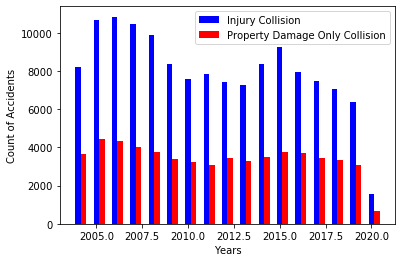

In [29]:
years  = data['Year'].unique()
width = 0.3
for year in years:
  X = data[data['Year'] == year]
  val1 = X[X['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X[X['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'blue')
  plt.bar(int(year) + width, val2, width  = width,color = 'red')
plt.xlabel('Years')
plt.ylabel('Count of Accidents')
plt.legend(X['SEVERITYDESC'].unique())
plt.show()

## Time plotting of accidents by Months

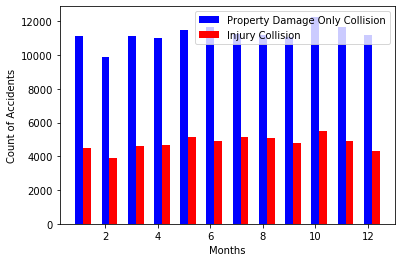

In [31]:
Y = data[data['Year'] != 2020]
years  = Y['Month'].unique()
width = 0.3
for year in years:
  X = Y[Y['Month'] == year]
  val1 = X[X['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X[X['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'blue')
  plt.bar(int(year) + width, val2, width  = width,color = 'red')
  
plt.xlabel('Months')
plt.ylabel('Count of Accidents')
plt.legend(X['SEVERITYDESC'].unique())
plt.show()

## Time plotting of accidents by Hours
The highest number of accidents by far happen at midnight from 12AM to 1 AM.

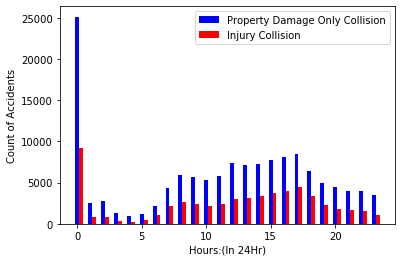

In [32]:
years  = data['Hour'].unique()
width = 0.3
for year in years:
  X = data[data['Hour'] == year]
  val1 = X[X['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X[X['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'blue')
  plt.bar(int(year) + width, val2, width  = width,color = 'red')

plt.xlabel('Hours:(In 24Hr)')
plt.ylabel('Count of Accidents')
plt.legend(X['SEVERITYDESC'].unique())
plt.show()

### After Data Analysis we understand what features we should use
Others features we will delete.

In [41]:
cols_to_drop = [ 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYDESC', 'INTKEY', 'LOCATION', 'STATUS', 'SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY', 'SEVERITYCODE.1']
data = data[data.columns.drop(cols_to_drop)]
data.T

,0,1,2,3,4,5,6,7,8,9,...,194663,194664,194665,194666,194667,194668,194669,194670,194671,194672
SEVERITYCODE,2,1,1,1,2,1,1,2,1,2,...,2,1,1,2,1,2,1,2,2,1
ADDRTYPE,Intersection,Block,Block,Block,Intersection,Intersection,Intersection,Intersection,Block,Intersection,...,Block,Intersection,Intersection,Block,Block,Block,Block,Intersection,Intersection,Block
COLLISIONTYPE,Angles,Sideswipe,Parked Car,Other,Angles,Angles,Angles,Cycles,Parked Car,Angles,...,Angles,Angles,Angles,Angles,Other,Head On,Rear Ended,Left Turn,Cycles,Rear Ended
PERSONCOUNT,2,2,4,3,2,2,2,3,2,2,...,3,8,2,2,1,3,2,3,2,2
PEDCOUNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PEDCYLCOUNT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
VEHCOUNT,2,2,3,3,2,2,2,1,2,2,...,2,3,2,2,1,2,2,2,1,2
INCDATE,2013/03/27 00:00:00+00,2006/12/20 00:00:00+00,2004/11/18 00:00:00+00,2013/03/29 00:00:00+00,2004/01/28 00:00:00+00,2019/04/20 00:00:00+00,2008/12/09 00:00:00+00,2020/04/15 00:00:00+00,2006/06/15 00:00:00+00,2006/03/20 00:00:00+00,...,2019/01/09 00:00:00+00,2018/12/30 00:00:00+00,2018/12/05 00:00:00+00,2019/01/04 00:00:00+00,2018/11/28 00:00:00+00,2018/11/12 00:00:00+00,2018/12/18 00:00:00+00,2019/01/19 00:00:00+00,2019/01/15 00:00:00+00,2018/11/30 00:00:00+00
JUNCTIONTYPE,At Intersection (intersection related),Mid-Block (not related to intersection),Mid-Block (not related to intersection),Mid-Block (not related to intersection),At Intersection (intersection related),At Intersection (intersection related),At Intersection (intersection related),At Intersection (intersection related),Mid-Block (not related to intersection),At Intersection (intersection related),...,Mid-Block (not related to intersection),At Intersection (intersection related),At Intersection (intersection related),Mid-Block (not related to intersection),Mid-Block (not related to intersection),Mid-Block (not related to intersection),Mid-Block (not related to intersection),At Intersection (intersection related),At Intersection (intersection related),Mid-Block (not related to intersection)
SDOT_COLCODE,11,16,14,11,11,11,11,51,11,11,...,11,11,11,11,28,11,14,11,51,14


### Most of the attributes are text-type, so we should convert them to a numerical type

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in ['ADDRTYPE', 'COLLISIONTYPE', 
       'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR']:
    data[column] = le.fit_transform(data[column].astype(str))
data.T

,0,1,2,3,4,5,6,7,8,9,...,194663,194664,194665,194666,194667,194668,194669,194670,194671,194672
SEVERITYCODE,2,1,1,1,2,1,1,2,1,2,...,2,1,1,2,1,2,1,2,2,1
ADDRTYPE,3,2,2,2,3,3,3,3,2,3,...,2,3,3,2,2,2,2,3,3,2
COLLISIONTYPE,1,10,6,5,1,1,1,2,6,1,...,1,1,1,1,5,3,8,4,2,8
PERSONCOUNT,2,2,4,3,2,2,2,3,2,2,...,3,8,2,2,1,3,2,3,2,2
PEDCOUNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PEDCYLCOUNT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
VEHCOUNT,2,2,3,3,2,2,2,1,2,2,...,2,3,2,2,1,2,2,2,1,2
INCDATE,3373,1084,322,3375,27,5588,1804,5949,896,809,...,5487,5477,5452,5482,5445,5429,5465,5497,5493,5447
JUNCTIONTYPE,2,5,5,5,2,2,2,2,5,2,...,5,2,2,5,5,5,5,2,2,5
SDOT_COLCODE,11,16,14,11,11,11,11,51,11,11,...,11,11,11,11,28,11,14,11,51,14


## Methodology
Our data is now ready to be fed into machine learning models.

We will use the following models:

K-Nearest Neighbor (KNN)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

Logistic Regression
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

Also we will use GradientBoosting, XGBClassifier, RandomForest and Support Vector Machine.

Exploratory data analysis was performed on the relevant categorical variables: address type, collision type, person count, pedestrian count, cyclist count, vehicle count, junction type, SDOT type, under the influence, weather, road conditions, light conditions, lane key, crosswalk key, and if a parked car was hit. The amount of categories in each variable ranged from a few to over a dozen. As a result, categories with less than a dozen variables were turned into countplots to better visualize the data. Statistical testing was not performed because the data revolved around categorical variables, not numerical ones.
Unfortunately, key variables such as pedestrian right of way, inattentive drivers, and whether the car was speeding had a majority of null values. Therefore, they were dropped and not part of the analysis. However, it is likely that these variables play a key factor in vehicle accidents.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Let's prepare training and test data

In [45]:
y = data['SEVERITYCODE'].values
data.drop(['SEVERITYCODE'],axis = 1,inplace = True)

In [46]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,194663,194664,194665,194666,194667,194668,194669,194670,194671,194672
ADDRTYPE,3,2,2,2,3,3,3,3,2,3,...,2,3,3,2,2,2,2,3,3,2
COLLISIONTYPE,1,10,6,5,1,1,1,2,6,1,...,1,1,1,1,5,3,8,4,2,8
PERSONCOUNT,2,2,4,3,2,2,2,3,2,2,...,3,8,2,2,1,3,2,3,2,2
PEDCOUNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PEDCYLCOUNT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
VEHCOUNT,2,2,3,3,2,2,2,1,2,2,...,2,3,2,2,1,2,2,2,1,2
INCDATE,3373,1084,322,3375,27,5588,1804,5949,896,809,...,5487,5477,5452,5482,5445,5429,5465,5497,5493,5447
JUNCTIONTYPE,2,5,5,5,2,2,2,2,5,2,...,5,2,2,5,5,5,5,2,2,5
SDOT_COLCODE,11,16,14,11,11,11,11,51,11,11,...,11,11,11,11,28,11,14,11,51,14
SDOT_COLDESC,14,16,17,14,14,14,14,29,14,14,...,14,14,14,14,12,14,17,14,29,17


In [47]:
X = StandardScaler().fit(data).transform(data.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Modeling

### K Nearest Neighbours

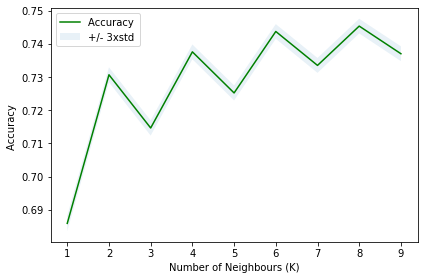

In [48]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
print('KNN')
y_hat = knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test, y_hat))

KNN
KNN Accuracy:  0.7306536535251059
F1 Score
0.6967436093817628
Jaccard
0.7306536535251059


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [55]:
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
print('KNN')
y_hat = knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test, y_hat))

KNN
KNN Accuracy:  0.7453191216129447
F1 Score
0.7188799477171677
Jaccard
0.7453191216129447


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Logistic Regression

In [50]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat =  LR.predict(X_test)
print('Logistic Regression')
print("LR Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test,y_hat))

Logistic Regression
LR Accuracy:  0.756876846025427
F1 Score
0.7132874902603377
Jaccard
0.756876846025427


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Feature Importance Analysis

Feature: 0, Score: 0.10598
Feature: 1, Score: -0.03360
Feature: 2, Score: 0.23521
Feature: 3, Score: 0.69655
Feature: 4, Score: 0.61586
Feature: 5, Score: 0.20006
Feature: 6, Score: -0.02354
Feature: 7, Score: -0.13173
Feature: 8, Score: 0.36191
Feature: 9, Score: -0.01825
Feature: 10, Score: 0.09172
Feature: 11, Score: 0.09251
Feature: 12, Score: -0.22406
Feature: 13, Score: 0.08230
Feature: 14, Score: -0.01666
Feature: 15, Score: 0.05105
Feature: 16, Score: 0.11753
Feature: 17, Score: -0.29919
Feature: 18, Score: -0.28263
Feature: 19, Score: -0.18710
Feature: 20, Score: -0.02377
Feature: 21, Score: 0.01197
Feature: 22, Score: -0.01027
Feature: 23, Score: -0.02742
Feature: 24, Score: 0.01524


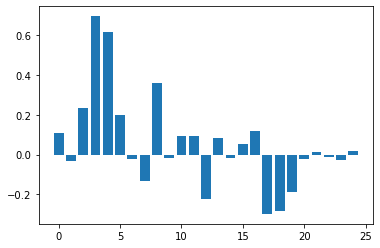

In [51]:
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Decision Tree Classifier

In [52]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_hat = dt.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.6912032875304995
F1 Score
0.6921588285370861
Jaccard Similarity
0.6912032875304995


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### GradientBoosting

In [59]:
clf = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
y_hat = clf.predict(X_test)
print("GradientBoosting Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test,y_hat))

GradientBoosting Accuracy:  0.7662771285475793
F1 Score
0.7360104486615571
Jaccard Similarity
0.7662771285475793


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### XGBoost Classifier

XGBoost Accuracy:  0.7648131501219982
F1 Score
0.732770713412748
Jaccard Similarity
0.7648131501219982
[0.03946929 0.08814345 0.08901575 0.03390456 0.12390279 0.0244675
 0.00359669 0.00399059 0.03146205 0.01344524 0.01114721 0.01100448
 0.11892598 0.00773847 0.03891451 0.00293264 0.01487582 0.05083993
 0.2791292  0.         0.         0.00548519 0.00226391 0.00336136
 0.00198345]


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


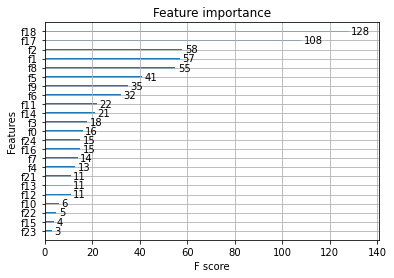

In [62]:
from xgboost import XGBClassifier
from xgboost import plot_importance
clf = XGBClassifier(random_state=4).fit(X_train,y_train)
y_hat = clf.predict(X_test)
print("XGBoost Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test,y_hat))
print(clf.feature_importances_)
plot_importance(clf)
plt.show()

### Random Forest Classifier

In [60]:
clf = RandomForestClassifier(max_depth=10, random_state=4).fit(X_train,y_train)
print('Random Forest')
y_hat = clf.predict(X_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test,y_hat ))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest
Random Forest's Accuracy:  0.7630152818800565
F1 Score
0.7225130831088236
Jaccard Similarity
0.7630152818800565


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Support Vector Machine

In [57]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
y_hat =clf.predict(X_test)
print('SVM')
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

SVM
SVM's Accuracy:  0.7629639142160011
F1 Score
0.7202837412246388
Jaccard Similarity
0.7629639142160011


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Results

Interestingly, the data shows that most accidents occur during the day with normal drivers and conditions.
Most of the cases involved property damage.
As expected, most occur at a block or intersection.
Most vehicle accidents occur during the best driving times when it is clear, during the day, and the roads are dry.

#### The Results of the classification are as follows:
KNN Accuracy: 0.7453191216129447

Logistic Regression Accuracy: 0.756876846025427

DecisionTrees's Accuracy: 0.6912032875304995

**GradientBoosting Accuracy: 0.7662771285475793**

XGBoost Accuracy: 0.7648131501219982

Random Forest's Accuracy: 0.7630152818800565

SVM's Accuracy: 0.7629639142160011

Very good results are from GradientBoosting(best result), XGBoost, Random Forest and Support Vector Machine.

## Discussion

The first striking observation has to do with the dependent variable. It seems highly unlikely that over the date range of the data no serious injuries or fatalities occurred. This may be a warning sign that the severity codes were somehow altered when the data set was being created, or that the sample data is incomplete and missing those reports.
The main recommendation has to do with key variables such as pedestrian right of way, inattentive drivers, and if the car was speeding. In many of the records, these values were null. However, this data should be collected in order to draw new insights or create better prediction models.
It was determined that most accidents occur during normal weather and road conditions. However, further data is needed to analyze this trend. It may be that these types of days constitute the highest number of days in the year. Therefore, further data on the weather needs to be analyzed. For example, it may be sunny for 100 days and then snow on 1 day. If you look at data for accidents, there may be 1000 accidents occur during sunny days and only 20 on snowy days. Really, the average number of accidents per weather type is much higher on snowy days. Though, because there are few days like that during the year the total number of accidents appears low.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.
Evaluation metrics used to test the accuracy of our models were jaccard index and f-1 score. 
Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

## Conclusion

The data-set has been used to classify the severity of the accidents based on certain select features.
The exploratory data analysis shows density of accidents based on geography based on Speeding, Driving Under Influence, In-attention and Hitting Parked Cars.
From a machine learning standpoint. The most important features were: Collision Type, Person Count, Vehicle Count and Address Type. The Gradient Boost algorithm performed the best.

The data showed that most vehicle accidents occur during good conditions with normal drivers. This means it will be harder for the Seattle transportation department to mitigate accidents. However, as most accidents only involve property damage or minor injuries, there is not a serious problem that needs to be dealt with right away. This shows that infrastructures are being designed and operating properly. Therefore, the focus should be an emphasis on drivers being more careful.

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).